In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity-prediction/sample_submission.csv
/kaggle/input/song-popularity-prediction/train.csv
/kaggle/input/song-popularity-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [3]:
df_train = pd.read_csv("/kaggle/input/song-popularity-prediction/train.csv")
df_test = pd.read_csv('/kaggle/input/song-popularity-prediction/test.csv')
#df_train = df_train.set_index('id')
df_train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


## Overview

In [4]:
df_train.shape

(40000, 15)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [6]:
df_train.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [7]:
scalar = MinMaxScaler()
df_train_scaled = pd.DataFrame(scalar.fit_transform(df_train))
df_train_scaled.columns = df_train.columns

In [8]:
for col in df_train.columns:
    print(col, ": ", len(df_train[col].unique()))

id :  40000
song_duration_ms :  31587
acousticness :  36005
danceability :  35973
energy :  36022
instrumentalness :  36000
key :  13
liveness :  35912
loudness :  36039
audio_mode :  2
speechiness :  39999
tempo :  39993
time_signature :  4
audio_valence :  39998
song_popularity :  2


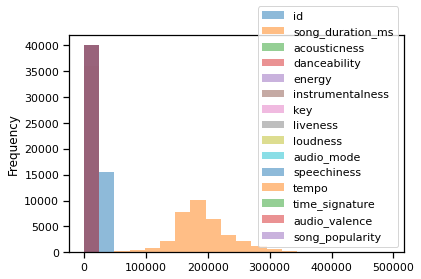

In [9]:
sns.set_context('notebook')
ax = df_train.plot.hist(bins=20, alpha=0.5)

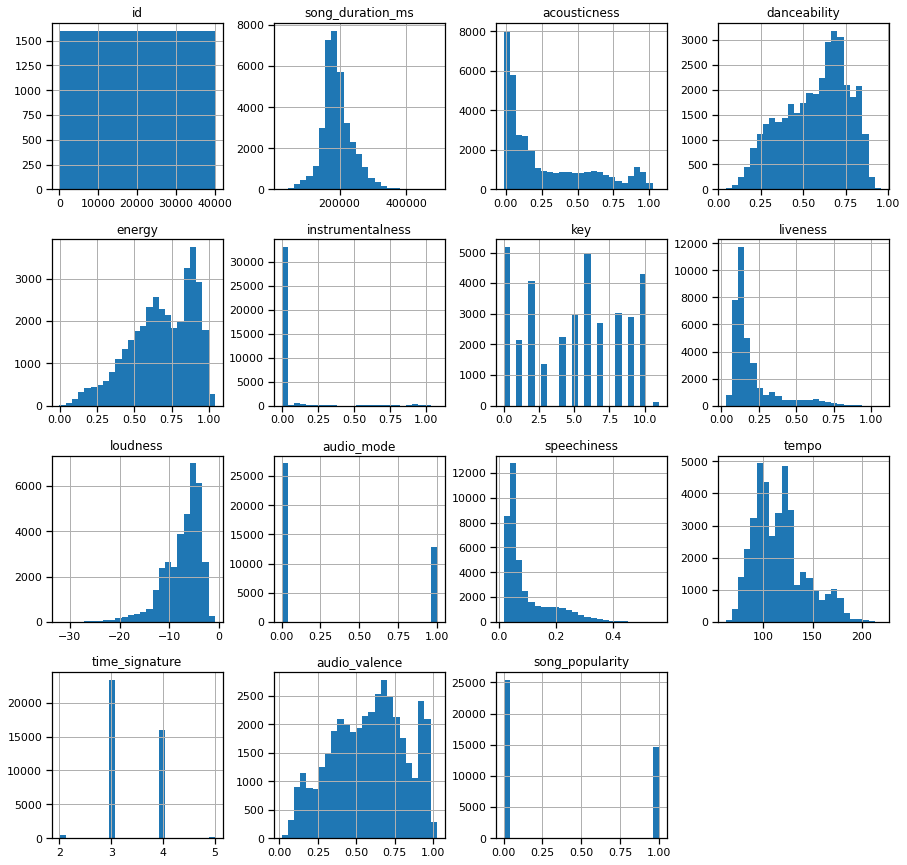

In [10]:
axList = df_train.hist(bins=25, figsize=(15,15))

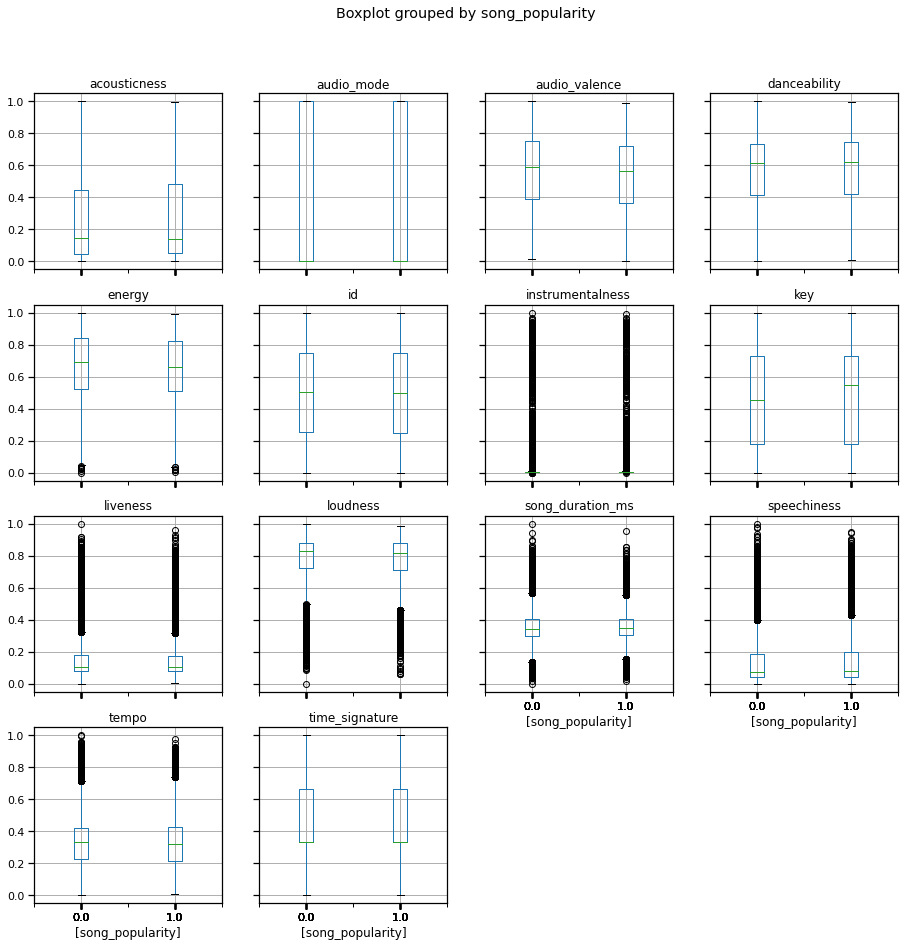

In [11]:
df_train_scaled.boxplot(by='song_popularity',figsize=(15,15));

In [12]:
#sns.set_context('talk')
#sns.pairplot(df_train, hue='song_popularity');

### Missing Values

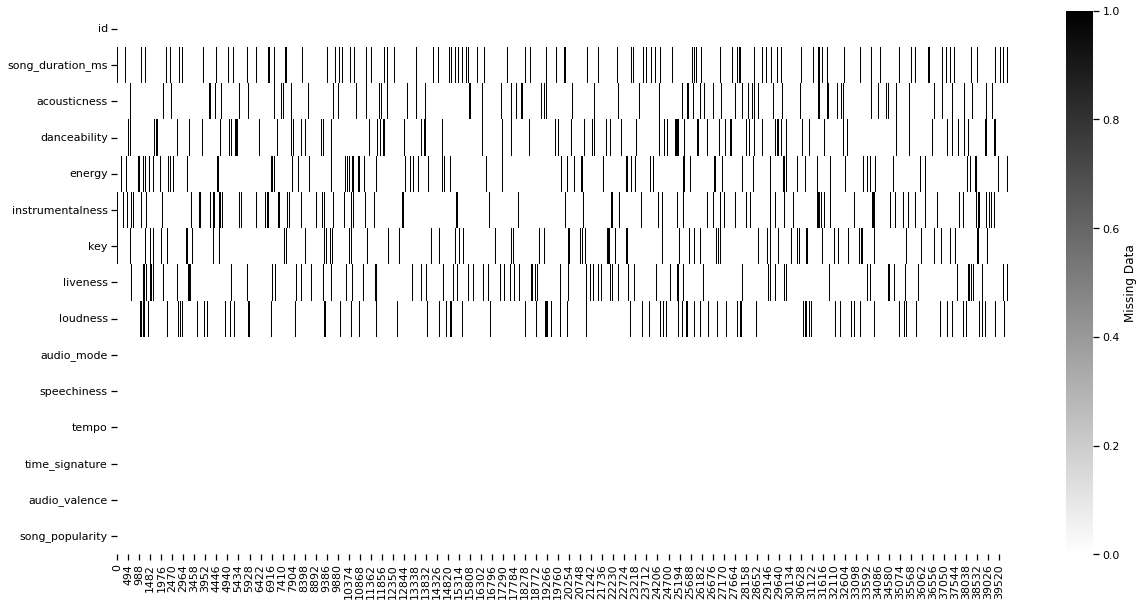

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isna().transpose(),cmap="binary",cbar_kws={'label': 'Missing Data'})
plt.show()

## Visualisation - Individual features

#### Density plot for all the columns

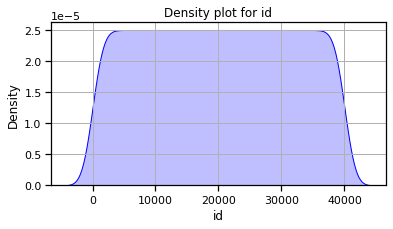

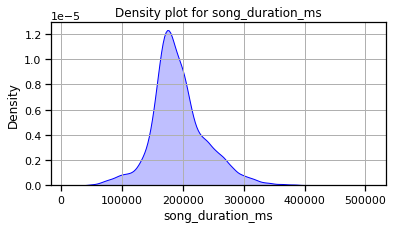

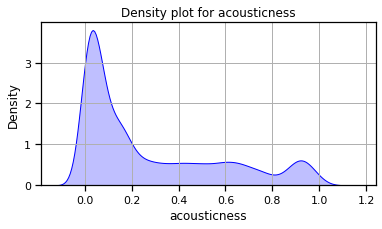

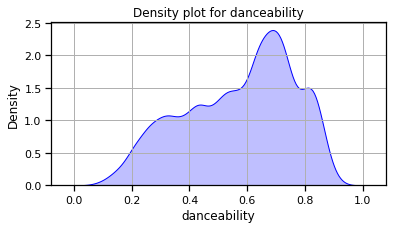

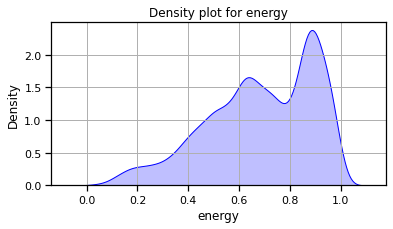

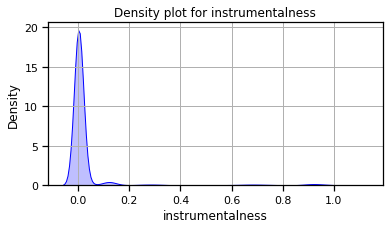

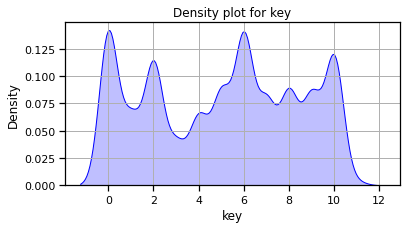

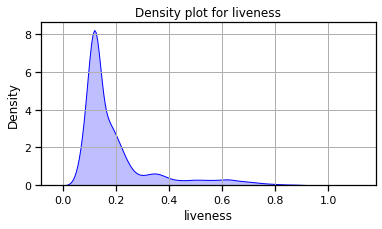

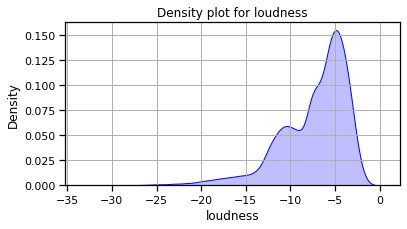

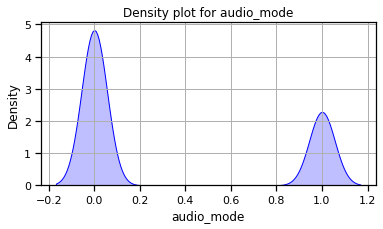

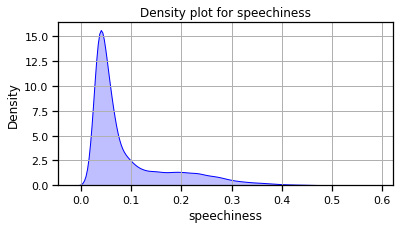

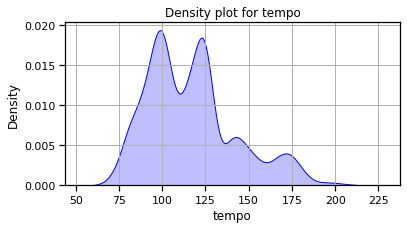

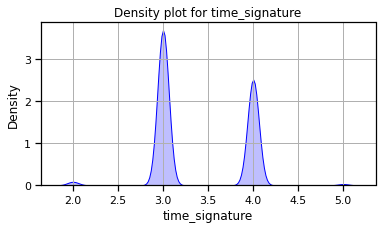

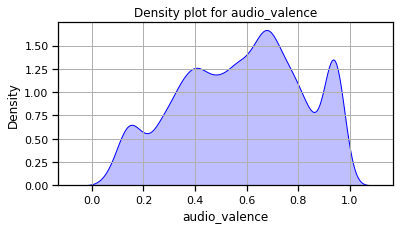

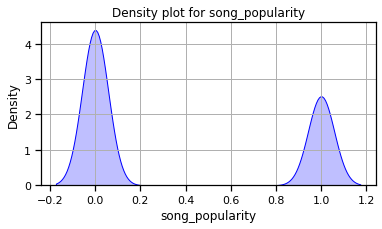

In [14]:
for col in df_train.columns:
    plt.figure(figsize=(6,3))
    title = 'Density plot for ' + str(col)
    plt.title(title)
    sns.kdeplot(df_train[col], color="blue", shade=True)

    plt.grid()
    plt.show()

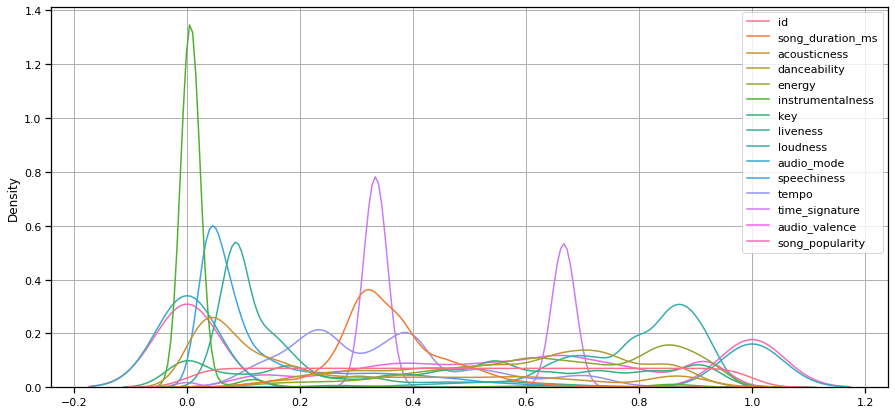

In [15]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df_train_scaled)
plt.grid()
plt.show()

### Bar plot for categorical values

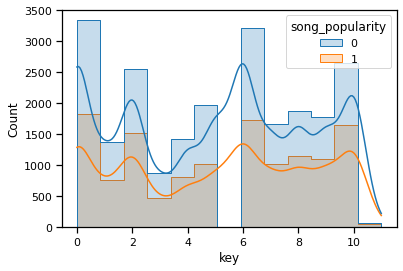

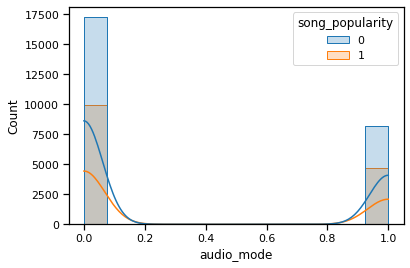

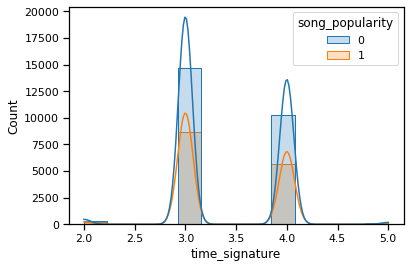

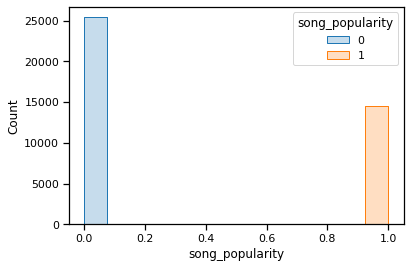

In [16]:
for col in df_train.columns:
    if len(df_train[col].unique()) < 15:
        #plt.figure(figsize=(6,3))
        sns.histplot(data=df_train, x=col, bins=len(df_train['key'].unique()), kde=True, hue="song_popularity", element="step")
        plt.show()

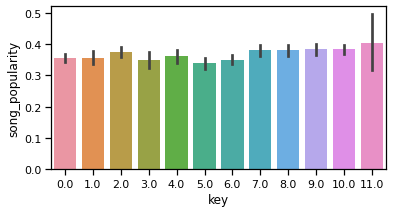

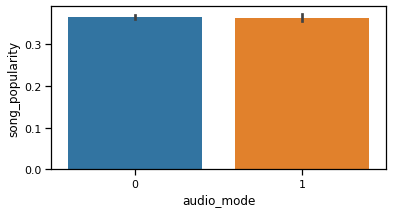

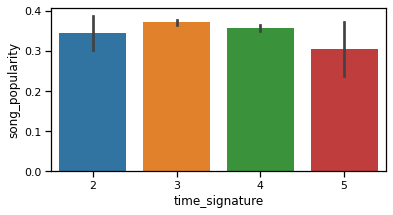

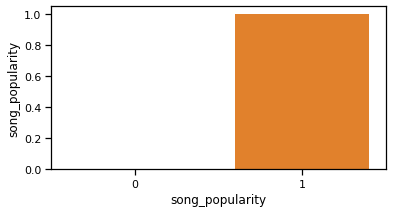

In [17]:
for col in df_train.columns:
    if len(df_train[col].unique()) < 15:
        plt.figure(figsize=(6,3))
        ax = sns.barplot(x=col, y="song_popularity", data=df_train)
        plt.show()

In [18]:
df_train.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')